In [ ]:
#Kaggle Data Source: https://www.kaggle.com/datasets/harshalhonde/starbucks-reviews-dataset
!pip install pandas
import pandas as pd

# create a data frame with csv file
df = pd.read_csv('reviews_data.csv')

#extract only the text
reviews = df['Review']

Number of Reviews about Starbucks: 850
                                              Review sentiment subjectivity
0  Amber and LaDonna at the Starbucks on Southwes...  positive    objective
1  ** at the Starbucks by the fire station on 436...  positive   subjective
2  I just wanted to go out of my way to recognize...  negative   subjective
3  Me and my friend were at Starbucks and my card...  positive    objective
4  I’m on this kick of drinking 5 cups of warm wa...  positive   subjective


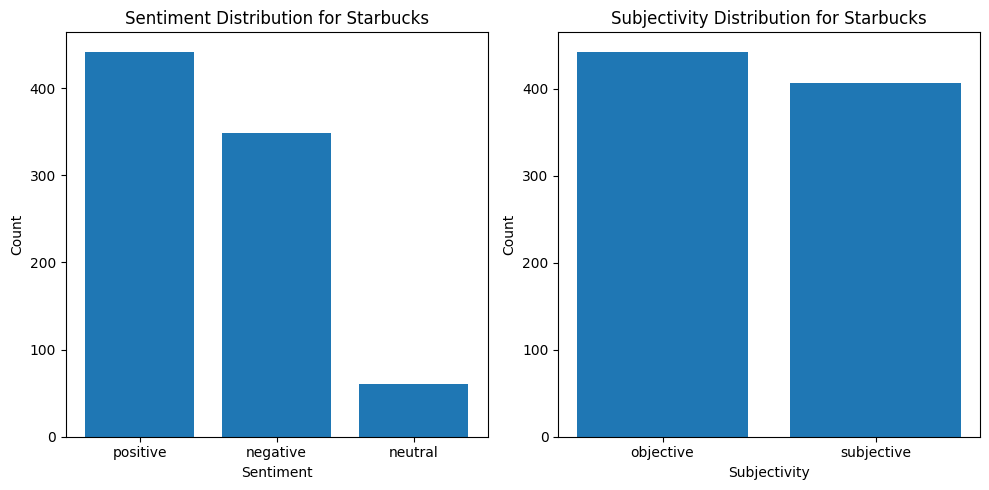

In [ ]:
###  Polarity and Subjectivity Starbucks Review Dataset ###

#Number of Reviews in Dataset:
num_records = len(reviews)
print(f'Number of Reviews about Starbucks: {num_records}')

# Import the required libraries
from textblob import TextBlob
import matplotlib.pyplot as plt

# Perform sentiment and subjectivity analysis on the text data
sentiments = []
subjectivities = []

for text in df['Review']:
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity

    if sentiment > 0:
        sentiments.append('positive')
    elif sentiment < 0:
        sentiments.append('negative')
    else:
        sentiments.append('neutral')

    if subjectivity > 0.5:
        subjectivities.append('subjective')
    else:
        subjectivities.append('objective')

# Add the predicted sentiments and subjectivities to the dataframe
df['sentiment'] = sentiments
df['subjectivity'] = subjectivities

# Print the first few rows of the data with the predicted sentiments and subjectivities
print(df[['Review', 'sentiment', 'subjectivity']].head())

# Count the number of each sentiment and subjectivity in the data
sentiment_counts = df['sentiment'].value_counts()
subjectivity_counts = df['subjectivity'].value_counts()

# Bar chart showing the sentiment distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution for Starbucks')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Bar chart showing the subjectivity distribution
plt.subplot(1, 2, 2)
plt.bar(subjectivity_counts.index, subjectivity_counts.values)
plt.title('Subjectivity Distribution for Starbucks')
plt.xlabel('Subjectivity')
plt.ylabel('Count')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the charts
plt.show()

#Export data
df.to_excel('data.xlsx', index=False)